In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Load the data
df = pd.read_csv('US_inflation_rates.csv', index_col='date', parse_dates=True)

df.dtypes

value    float64
dtype: object

In [5]:
# change the values in the 'rate' column to percentage change
df['change'] = df['value'].pct_change() * 100
df

,value,change
date,,
1947-01-01,21.480,NaN
1947-02-01,21.620,0.651769
1947-03-01,22.000,1.757632
1947-04-01,22.000,0.000000
1947-05-01,21.950,-0.227273
...,...,...
2023-02-01,301.648,0.370006
2023-03-01,301.808,0.053042
2023-04-01,302.918,0.367783


In [6]:
df_2 = pd.read_csv('SeriesReport-20240324235202_f3e23e.csv')
df_2

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,HALF1,HALF2
0,2014,1.6,1.6,1.7,1.8,2.0,1.9,1.9,1.7,1.7,1.8,1.7,1.6,1.8,1.7
1,2015,1.6,1.7,1.8,1.8,1.7,1.8,1.8,1.8,1.9,1.9,2.0,2.1,1.7,1.9
2,2016,2.2,2.3,2.2,2.1,2.2,2.2,2.2,2.3,2.2,2.1,2.1,2.2,2.2,2.2
3,2017,2.3,2.2,2.0,1.9,1.7,1.7,1.7,1.7,1.7,1.8,1.7,1.8,2.0,1.7
4,2018,1.8,1.8,2.1,2.1,2.2,2.3,2.4,2.2,2.2,2.1,2.2,2.2,2.1,2.2
5,2019,2.2,2.1,2.0,2.1,2.0,2.1,2.2,2.4,2.4,2.3,2.3,2.3,2.1,2.3
6,2020,2.3,2.4,2.1,1.4,1.2,1.2,1.6,1.7,1.7,1.6,1.6,1.6,1.8,1.6
7,2021,1.4,1.3,1.6,3.0,3.8,4.5,4.3,4.0,4.0,4.6,4.9,5.5,2.6,4.5
8,2022,6.0,6.4,6.5,6.2,6.0,5.9,5.9,6.3,6.6,6.3,6.0,5.7,6.2,6.1
9,2023,5.6,5.5,5.6,5.5,5.3,4.8,4.7,4.3,4.1,4.0,4.0,3.9,5.4,4.2


In [7]:
#drop the last 2 columns
df_2 = df_2.drop(df_2.columns[-2:], axis=1)

#change column names to their respective months

df_2.columns = ['Year', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12']
df_2



,Year,1,2,3,4,5,6,7,8,9,10,11,12
0,2014,1.6,1.6,1.7,1.8,2.0,1.9,1.9,1.7,1.7,1.8,1.7,1.6
1,2015,1.6,1.7,1.8,1.8,1.7,1.8,1.8,1.8,1.9,1.9,2.0,2.1
2,2016,2.2,2.3,2.2,2.1,2.2,2.2,2.2,2.3,2.2,2.1,2.1,2.2
3,2017,2.3,2.2,2.0,1.9,1.7,1.7,1.7,1.7,1.7,1.8,1.7,1.8
4,2018,1.8,1.8,2.1,2.1,2.2,2.3,2.4,2.2,2.2,2.1,2.2,2.2
5,2019,2.2,2.1,2.0,2.1,2.0,2.1,2.2,2.4,2.4,2.3,2.3,2.3
6,2020,2.3,2.4,2.1,1.4,1.2,1.2,1.6,1.7,1.7,1.6,1.6,1.6
7,2021,1.4,1.3,1.6,3.0,3.8,4.5,4.3,4.0,4.0,4.6,4.9,5.5
8,2022,6.0,6.4,6.5,6.2,6.0,5.9,5.9,6.3,6.6,6.3,6.0,5.7
9,2023,5.6,5.5,5.6,5.5,5.3,4.8,4.7,4.3,4.1,4.0,4.0,3.9


In [8]:
#melt

df_2 = pd.melt(df_2, id_vars='Year', var_name='Month', value_name='Infaltion Rate')

In [9]:
#change month and year to datetime
df_2['Month'] = df_2['Month'].astype(int)
df_2['Year'] = df_2['Year'].astype(int)
df_2['Month'] = df_2['Month'].apply(lambda x: '{0:0>2}'.format(x))
df_2['Year'] = df_2['Year'].astype(str)
df_2['Month'] = df_2['Month'].astype(str)
df_2['Date'] = df_2['Year'] + '-' + df_2['Month']
df_2['Date'] = pd.to_datetime(df_2['Date'])

#sort
df_2 = df_2.sort_values(by=['Year', 'Month'])
df_2.drop(['Year', 'Month'], axis=1, inplace=True)

In [10]:
#drop dates before 2019
df_2 = df_2[df_2['Date'] >= '2019-01-01']

In [11]:
df_2

,Infaltion Rate,Date
5,2.2,2019-01-01
16,2.1,2019-02-01
27,2.0,2019-03-01
38,2.1,2019-04-01
49,2.0,2019-05-01
...,...,...
87,NaN,2024-08-01
98,NaN,2024-09-01
109,NaN,2024-10-01
120,NaN,2024-11-01


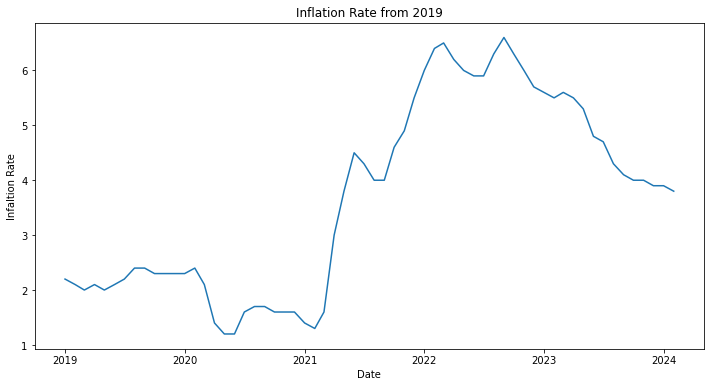

In [9]:
#plot a time series of inflation rates from 2019
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Infaltion Rate', data=df_2)
plt.title('Inflation Rate from 2019')
plt.show()


In [10]:
df_3 = pd.read_csv("Stock Market Dataset.csv", index_col='Date', parse_dates=True)

df_3.drop(columns='Unnamed: 0', inplace=True, axis=1)
df_3.head()

,Natural_Gas_Price,Natural_Gas_Vol.,Crude_oil_Price,Crude_oil_Vol.,Copper_Price,Copper_Vol.,Bitcoin_Price,Bitcoin_Vol.,Platinum_Price,Platinum_Vol.,...,Berkshire_Price,Berkshire_Vol.,Netflix_Price,Netflix_Vol.,Amazon_Price,Amazon_Vol.,Meta_Price,Meta_Vol.,Gold_Price,Gold_Vol.
Date,,,,,,,,,,,,,,,,,,,,,
02-02-2024,2.079,NaN,72.28,NaN,3.8215,NaN,"43,194.70",42650.0,901.6,NaN,...,"5,89,498",10580.0,564.64,4030000.0,171.81,117220000.0,474.99,84710000.0,"2,053.70",NaN
01-02-2024,2.050,161340.0,73.82,577940.0,3.8535,NaN,"43,081.40",47690.0,922.3,NaN,...,"5,81,600",9780.0,567.51,3150000.0,159.28,66360000.0,394.78,25140000.0,"2,071.10",260920.0
31-01-2024,2.100,142860.0,75.85,344490.0,3.9060,NaN,"42,580.50",56480.0,932.6,NaN,...,"5,78,020",9720.0,564.11,4830000.0,155.20,49690000.0,390.14,20010000.0,"2,067.40",238370.0
30-01-2024,2.077,139750.0,77.82,347240.0,3.9110,NaN,"42,946.20",55130.0,931.7,NaN,...,"5,84,680",9750.0,562.85,6120000.0,159.00,42290000.0,400.06,18610000.0,"2,050.90",214590.0
29-01-2024,2.490,3590.0,76.78,331930.0,3.8790,NaN,"43,299.80",45230.0,938.3,NaN,...,"5,78,800",13850.0,575.79,6880000.0,161.26,42840000.0,401.02,17790000.0,"2,034.90",1780.0


In [11]:
df_3.dtypes

#convert s&p 500 to float
df_3['S&P_500_Price'] = df_3['S&P_500_Price'].str.replace(',', '').astype(float)


In [12]:
# make a new df with only the s&p 500 price
df_3_snp = df_3[['S&P_500_Price']]

# convert the index to datetime type
df_3_snp.index = pd.to_datetime(df_3_snp.index, format='%d-%m-%Y')

# a mask that selects only the first entry of each month
mask = df_3_snp.index.to_series().dt.day == 1

# filter the data such that only the first entry of each month is selected
df_3_snp = df_3_snp[mask]

df_3_snp = df_3_snp.sort_index()

df_3_snp['change'] = df_3_snp['S&P_500_Price'].pct_change() * 100

df_3_snp

,S&P_500_Price,change
Date,,
2019-03-01,2803.69,NaN
2019-04-01,2867.19,2.264872
2019-05-01,2923.73,1.971966
2019-07-01,2964.33,1.388637
2019-08-01,2953.56,-0.363320
2019-10-01,2940.25,-0.450643
2019-11-01,3066.91,4.307797
2020-04-01,2470.50,-19.446609
2020-05-01,2830.71,14.580449


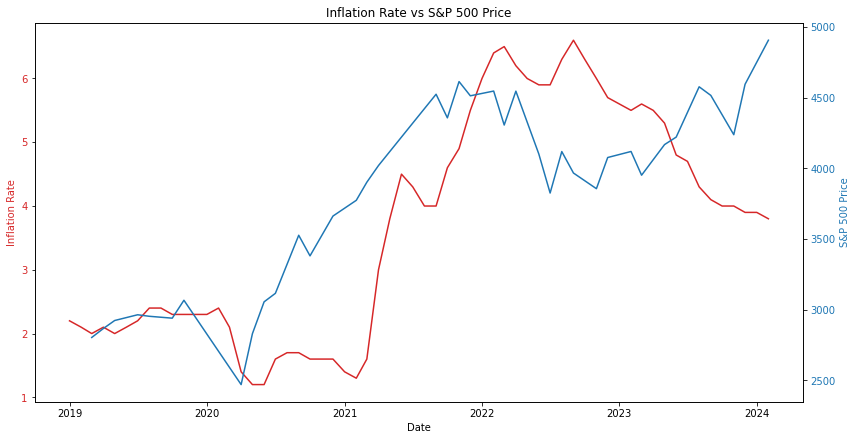

In [13]:
#plot a time series of the s&p 500 price and df_2 inflation rate

fig, ax1 = plt.subplots(figsize=(12, 6))

color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('Inflation Rate', color=color)
ax1.plot(df_2['Date'], df_2['Infaltion Rate'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('S&P 500 Price', color=color)
ax2.plot(df_3_snp.index, df_3_snp['S&P_500_Price'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.title('Inflation Rate vs S&P 500 Price')
plt.show()


In [14]:
if 'Date' in df_2.columns:
    df_2.set_index('Date', inplace=True)
else:
    df_2.reset_index(inplace=True)
    df_2.set_index('Date', inplace=True)

df_2.index = pd.to_datetime(df_2.index, format='%Y-%m-%d')

df_merged = df_2.merge(df_3_snp, left_index=True, right_index=True)

#calculate the correlation between the inflation rate and the s&p 500 price
correlation = df_merged['Infaltion Rate'].corr(df_merged['S&P_500_Price'])
correlation

0.7077894967637639

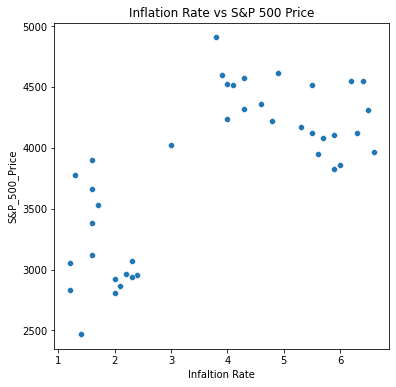

In [16]:
#scatter plot of the inflation rate and the s&p 500 price
plt.figure(figsize=(6, 6))
sns.scatterplot(x='Infaltion Rate', y='S&P_500_Price', data=df_merged )
plt.title('Inflation Rate vs S&P 500 Price')
plt.show()